In [77]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
import numpy as np
import random
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [32]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()
classes = [9, 30, 49, 58, 69]
labels = ['bottle', 'dolphin', 'mountain', 'pickup_truck', 'rocket']

In [56]:
x_train = []
y_train = []
x_test = []
y_test = []

# filtering required training classes
for index, _class in enumerate(Y_train):
    if _class in classes:
        x_train.append(X_train[index])
        y_train.append(classes.index(Y_train[index]))

# filtering required training classes    
for index, _class in enumerate(Y_test):
    if _class in classes:
        x_test.append(X_test[index])
        y_test.append(classes.index(Y_test[index]))
        
#converting to np array
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

[2 0 2 ... 3 2 2]


In [4]:
# Parse numbers as floats
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

# Normalize data
x_train = x_train / 255
x_test = x_test / 255

In [21]:
# Model configuration / hyperparameters
input_shape = (32,32,3)
batch_size = 50
loss_function = sparse_categorical_crossentropy
number_of_classes = len(classes)
number_of_epochs = 20
optimizer = Adam()
verbosity = 1

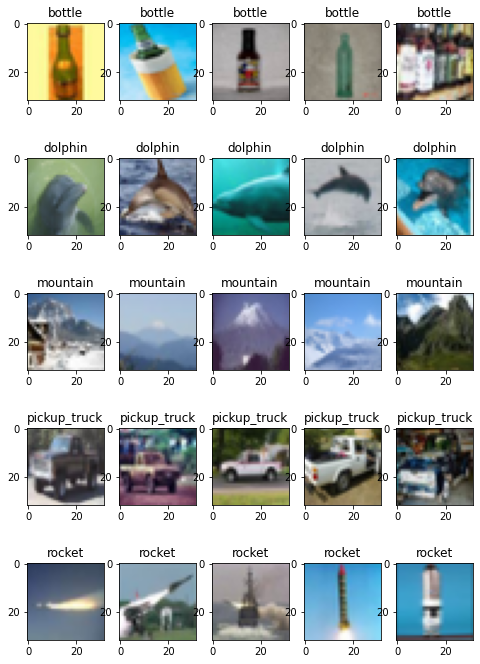

In [33]:
# Draw sample data
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(8, 12))
for i in range(number_of_classes):
    for j in range(number_of_classes):
        loop = True
        rand_index = random.randint(0, len(y_train)-1)
        while loop == True:
            if y_train[rand_index] == i:
                axes[i][j].set_title(labels[i])
                axes[i][j].imshow(x_train[rand_index])
                loop = False
            else:
                rand_index = random.randint(0, len(y_train)-1)


In [23]:
def create_model(input_shape, number_of_classes):
    # Create the model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(number_of_classes, activation='softmax'))
    return model

In [24]:
# Visualization of history
def draw_chart(history):
    plt.figure(1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training','validation'])
    plt.title('loss')
    plt.xlabel('epoch')
    plt.figure(2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['training','validation'])
    plt.title('Accurracy')
    plt.xlabel('epoch')
    plt.show()

In [25]:
# Create the model
model = create_model(input_shape, number_of_classes)
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)        

In [26]:
# Train model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=number_of_epochs,
            verbose=verbosity,
            validation_data=(x_test,y_test))


Epoch 1/20
50/50 [==============================] - 3s 38ms/step - loss: 1.3280 - accuracy: 0.4408 - val_loss: 1.1318 - val_accuracy: 0.5460
Epoch 2/20
50/50 [==============================] - 2s 34ms/step - loss: 0.9311 - accuracy: 0.6492 - val_loss: 0.8855 - val_accuracy: 0.6860
Epoch 3/20
50/50 [==============================] - 2s 34ms/step - loss: 0.7667 - accuracy: 0.7248 - val_loss: 0.7690 - val_accuracy: 0.7400
Epoch 4/20
50/50 [==============================] - 2s 34ms/step - loss: 0.6440 - accuracy: 0.7656 - val_loss: 0.6509 - val_accuracy: 0.7880
Epoch 5/20
50/50 [==============================] - 2s 34ms/step - loss: 0.5648 - accuracy: 0.7880 - val_loss: 0.6848 - val_accuracy: 0.7840
Epoch 6/20
50/50 [==============================] - 2s 34ms/step - loss: 0.5390 - accuracy: 0.7984 - val_loss: 0.6253 - val_accuracy: 0.7900
Epoch 7/20
50/50 [==============================] - 2s 35ms/step - loss: 0.5199 - accuracy: 0.8056 - val_loss: 0.6777 - val_accuracy: 0.7560
Epoch 8/20
50

In [27]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.8511449098587036 / Test accuracy: 0.7960000038146973


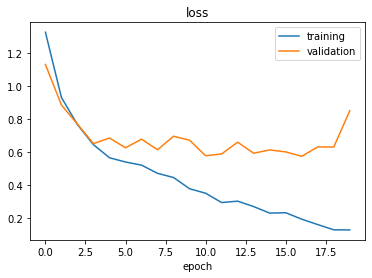

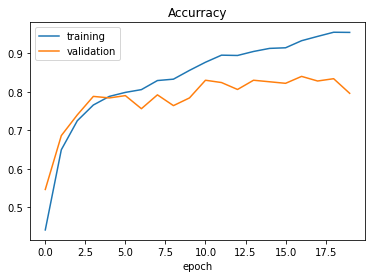

In [28]:
draw_chart(history)

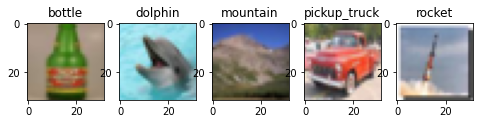

In [83]:
# predictions

predictions = []
actual = []
fig,axes = plt.subplots(nrows = 1, ncols = 5, figsize=(8, 12))
row = 0

# Predict 1 image of each class
for i in range(5):
    loop = True
    while loop == True:
        rand_index = random.randint(0, len(y_test) -1)
        if y_test[rand_index] == i:
            image = x_test[rand_index]
            axes[i].imshow(image)
            image = image.reshape(1, 32, 32, 3)
            image_class = model.predict_classes(image)
            predictions.append(image_class[0])
            actual.append(y_train[rand_index])
            axes[i].set_title(labels[image_class[0]])
            loop = False
        else:
            rand_index = random.randint(0, len(y_test) -1)

In [81]:
confusion_matrix(predictions, actual)

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0]], dtype=int64)

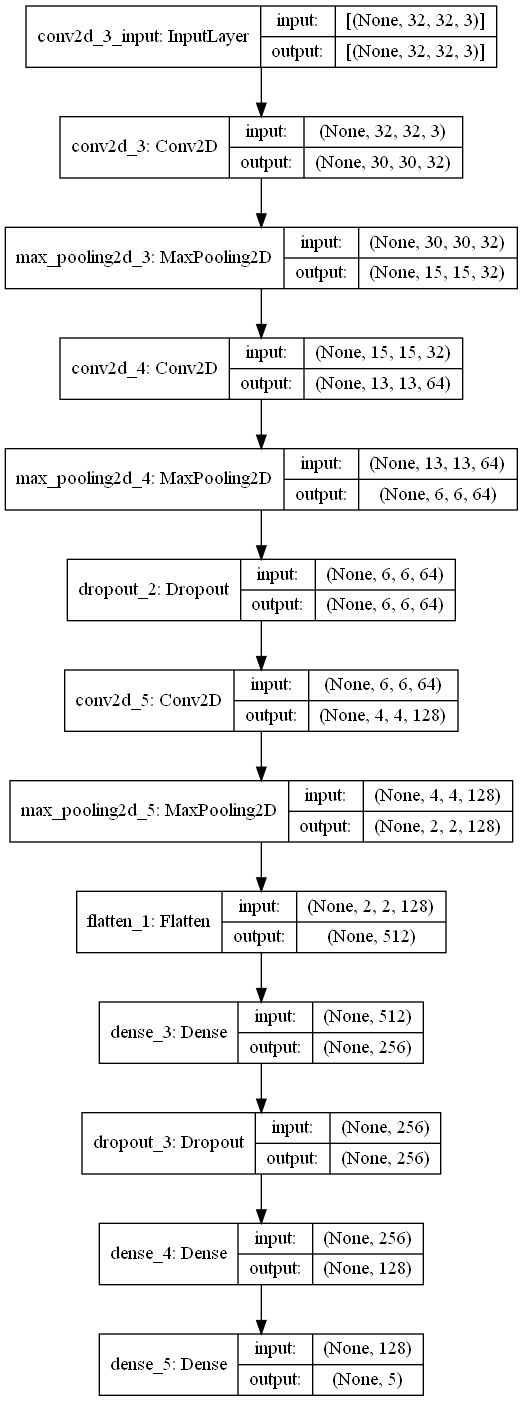

In [31]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)